# IDEA:

Now we want to obtain 5 df, one for each user that we obtain from the cluster analysis 

this is the first step for build our NN, since we want to train the model with the song that each single User listen, and we want to predict the 'valence' (that is a evaluation of how much the song is liked to the user) based on the teste of the single user

## Df

In [1]:
# we recall our df after the clustering procedure
%store -r merge_unique_df

FIRST IMPLEMENTATION 

In [2]:
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [3]:
# i want to rename the column Cluster --> WILL BE OUR USER 
merge_unique_df.rename(columns={'cluster':'User'},inplace=True)
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [4]:
# to see wich feature consider in the model 
merge_unique_df.columns

Index(['Performer', 'Song', 'spotify_genre', 'spotify_track_duration_minute',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'maingenere', 'User'],
      dtype='object')

In [5]:
merge_unique_df.shape

(27207, 21)

In [6]:
# to verify that we don't have Nan value after the marge
merge_unique_df.isnull().sum()

Performer                        0
Song                             0
spotify_genre                    0
spotify_track_duration_minute    0
spotify_track_explicit           0
spotify_track_album              0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
time_signature                   0
spotify_track_popularity         0
maingenere                       0
User                             0
dtype: int64

## PACKAGES

In [7]:
# package that we need
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error

# essential
import numpy as np
import matplotlib.pyplot as plt

#correlation
import seaborn as sns


#RICORDARE DA INSTALLARE PEDROLLO 
! pip install pydot


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Now we can try to develop our (first) NN

In [8]:
# fisrt we define the FEATURE of our model --> INPUT
feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
target='valence'

# we also define the USER, since we train the model dividing by users
user='User'

In [9]:
len(feature)

13

### USER 1 - Test


In [10]:
# first we have to obtain only the songs listen to the USER1
mask_user1=merge_unique_df['User']==1
user1_df=merge_unique_df[mask_user1]
user1_df.shape

(4669, 21)

In [11]:
user1_df.User.unique()

array([1])

In [12]:
# we obtain the user1 subset
user1_df.head(3)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",3.66,False,Radio Hits Of the '80s,0.647,0.686,2.0,-4.247,...,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,rock,1
'til I Can Make It On My OwnTammy Wynette,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",3.03,False,The Essential Tammy Wynette,0.450,0.294,7.0,-12.022,...,0.0318,0.8320,0.000035,0.1080,0.146,141.148,4.0,31.0,country,1
'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,"['funk', 'motown', 'neo soul', 'new jack swing...",5.54,False,The Night I Fell In Love,0.804,0.714,11.0,-6.714,...,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,soul,1


In [13]:
#E SE TRASFORMASSIMO IL MAINGENERE IN UN NUMERO????? POTREBBE ESSERE UTILE PER CONSIGLIARE LE CANZONI?? (magari in un mese ascolta solo un genere quindi meglio consigliargli un genere simile)
print(user1_df['maingenere'].value_counts()) #check song recensite
mean_valence_maingenere = user1_df.groupby('maingenere')['valence'].mean() #check the mean for maingenere (the averege rank that the usere give to some type of songs)
display(mean_valence_maingenere)

maingenere
pop        1256
rock       1108
country     521
rap         520
other       483
soul        308
metal        69
disco        66
dance        65
folk         50
blues        48
jazz         43
funk         40
house        31
indie        24
r&b          23
latin        14
Name: count, dtype: int64


maingenere
blues      0.825375
country    0.496266
dance      0.601092
disco      0.648318
folk       0.602440
funk       0.601755
house      0.552652
indie      0.682583
jazz       0.603488
latin      0.709857
metal      0.374229
other      0.664371
pop        0.595602
r&b        0.533957
rap        0.460987
rock       0.631969
soul       0.655705
Name: valence, dtype: float64

Note:
in order to understand the property of our cluster, we check for wich is the mean vote for each maingenre:

we see that the user like a lot blues and don't like metal, this generes can be use to test the model 

(check if the model propose the song with this main genere)

In [14]:
# now we estract the FEATURE
x=user1_df[feature]
#x.columns

# and the TARGET
y=user1_df[target]
#y

In [15]:
# NORMALIZE OUR FEATURES

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)

In [16]:
# now we divide the df in test and train 
# necessary in order test our results after the application of the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [17]:
# for keras we need to convert y_train and y_test in Numpy array 
y_train=np.array(y_train)
y_test=np.array(y_test)

#before apply the model we need to verify the shape of this array

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3735, 13), (934, 13), (3735,), (934,))

In [18]:
x_train.shape[1]

13

In [19]:
# are 13 as the number of input that we have to insert in the input_dim --> only in the first layer
x.columns

Index(['spotify_track_duration_minute', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'tempo',
       'time_signature', 'spotify_track_popularity', 'instrumentalness',
       'liveness'],
      dtype='object')

In [20]:
# NOW WE CAN TRY TO APPLY OUR NN (LINEAR)
model_user1=Sequential([
    Dense(64,input_dim=x_train.shape[1],activation='relu',name='first_layer'),
    # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
    # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
    
    # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
    

    Dense(32,activation='relu',name='secod_layer'),
    Dense(1,activation='linear',name='final_layer')
])

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Now we try to compile the model
model_user1.compile(optimizer='adam',loss='mse',metrics=['mae']) #CAN WE PUT ALSO ACCURACY IN METRICS?

#now see some results
model_user1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Now we can train our model
history_model_user1=model_user1.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2433 - mae: 0.3788 - val_loss: 0.0564 - val_mae: 0.1869
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0473 - mae: 0.1734 - val_loss: 0.0413 - val_mae: 0.1592
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357 - mae: 0.1524 - val_loss: 0.0371 - val_mae: 0.1508
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0307 - mae: 0.1411 - val_loss: 0.0348 - val_mae: 0.1467
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0297 - mae: 0.1378 - val_loss: 0.0342 - val_mae: 0.1452
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277 - mae: 0.1335 - val_loss: 0.0353 - val_mae: 0.1450
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 - mae: 0.1307 - val_loss: 0.0328 - val_mae: 0.1420
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 - mae: 0.1265 - val_loss: 0.0325 - val_mae: 0.1417
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260 - mae: 

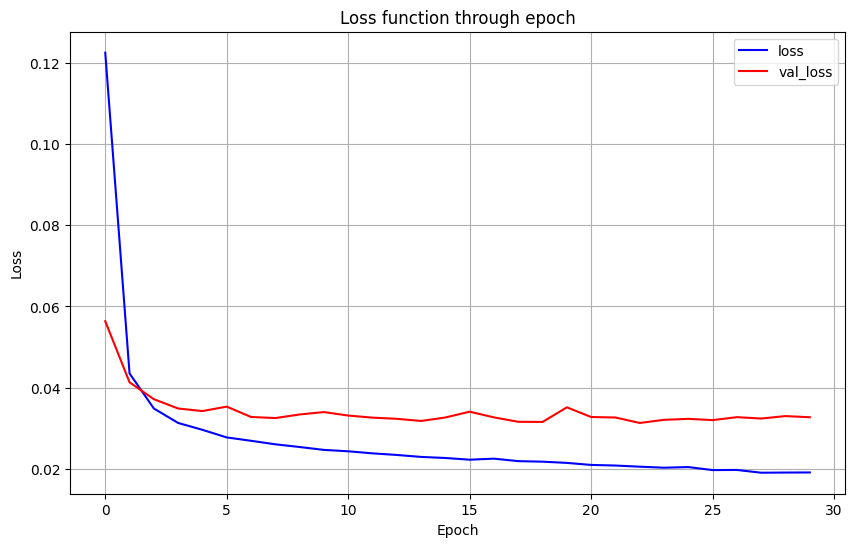

In [23]:
# we can try to perform some plots
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['loss'],color='blue',label='loss')
plt.plot(history_model_user1.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

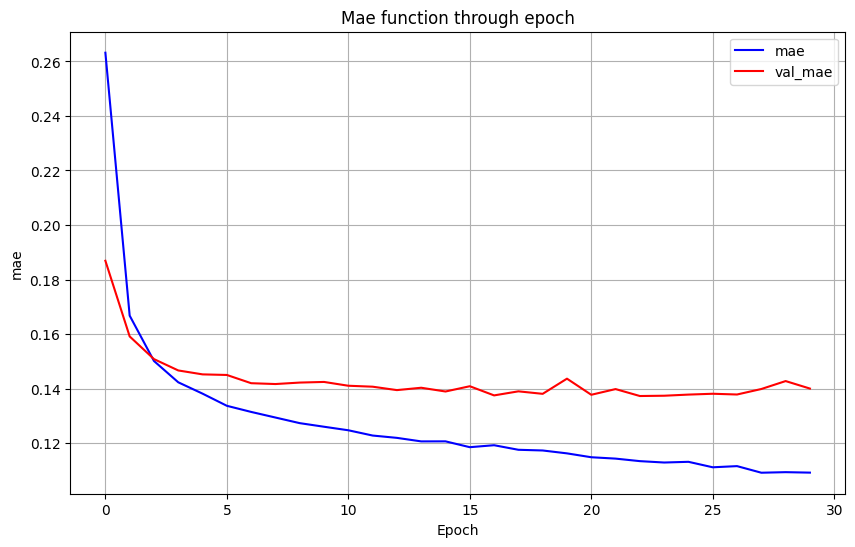

In [24]:
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['mae'],color='blue',label='mae')
plt.plot(history_model_user1.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()

In [25]:
print(history_model_user1.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [26]:
# keras.utils.plot_model( model, show_shapes=True)
#keras.utils.plot_model(model_user1,show_shapes=True)

# non mi plotta nulla --> da rivedere perchè non avevo pacchetto installato 

In [27]:
# now we can evaluate the test data

test_loss, test_mae = model_user1.evaluate(x_test,y_test,verbose=1)

test_loss,test_mae

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0284 - mae: 0.1325


(0.02915799990296364, 0.13534393906593323)

Now we have to try to predict the possible valence (y_hat)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\2698145846.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


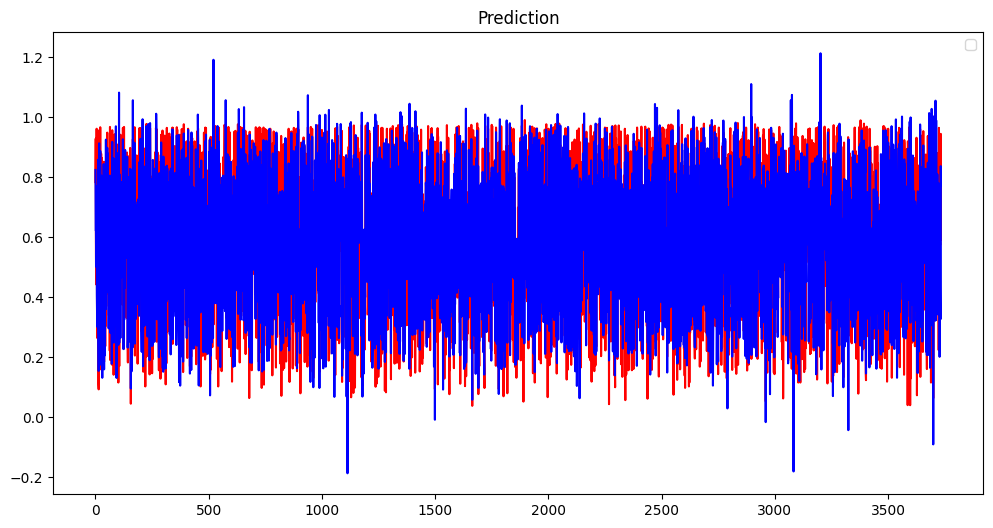

In [28]:
yhat = model_user1.predict(x_train) #DA RIVEDERE!!!!

plt.figure(figsize=(12,6))
plt.plot(y_train, color='r')
plt.plot(yhat, color='b') #attenzione alcune predizione sono negative
plt.title('Prediction')
plt.legend()
plt.show()

### END of OUR TEST

What we notice:

1) Important to check for the correlation, in order to understand if all the features that we consider for the NN beside are relevant 

2) Mybe the numbers of the intial neurons are to high since we see that the loss and the mae after only five epoch are almost constant 

3) We want to automatize the process, in order to avoid to define each df for each user and appy for each a diffrent model

---

# UPDATE 

1) Check for the correlation 

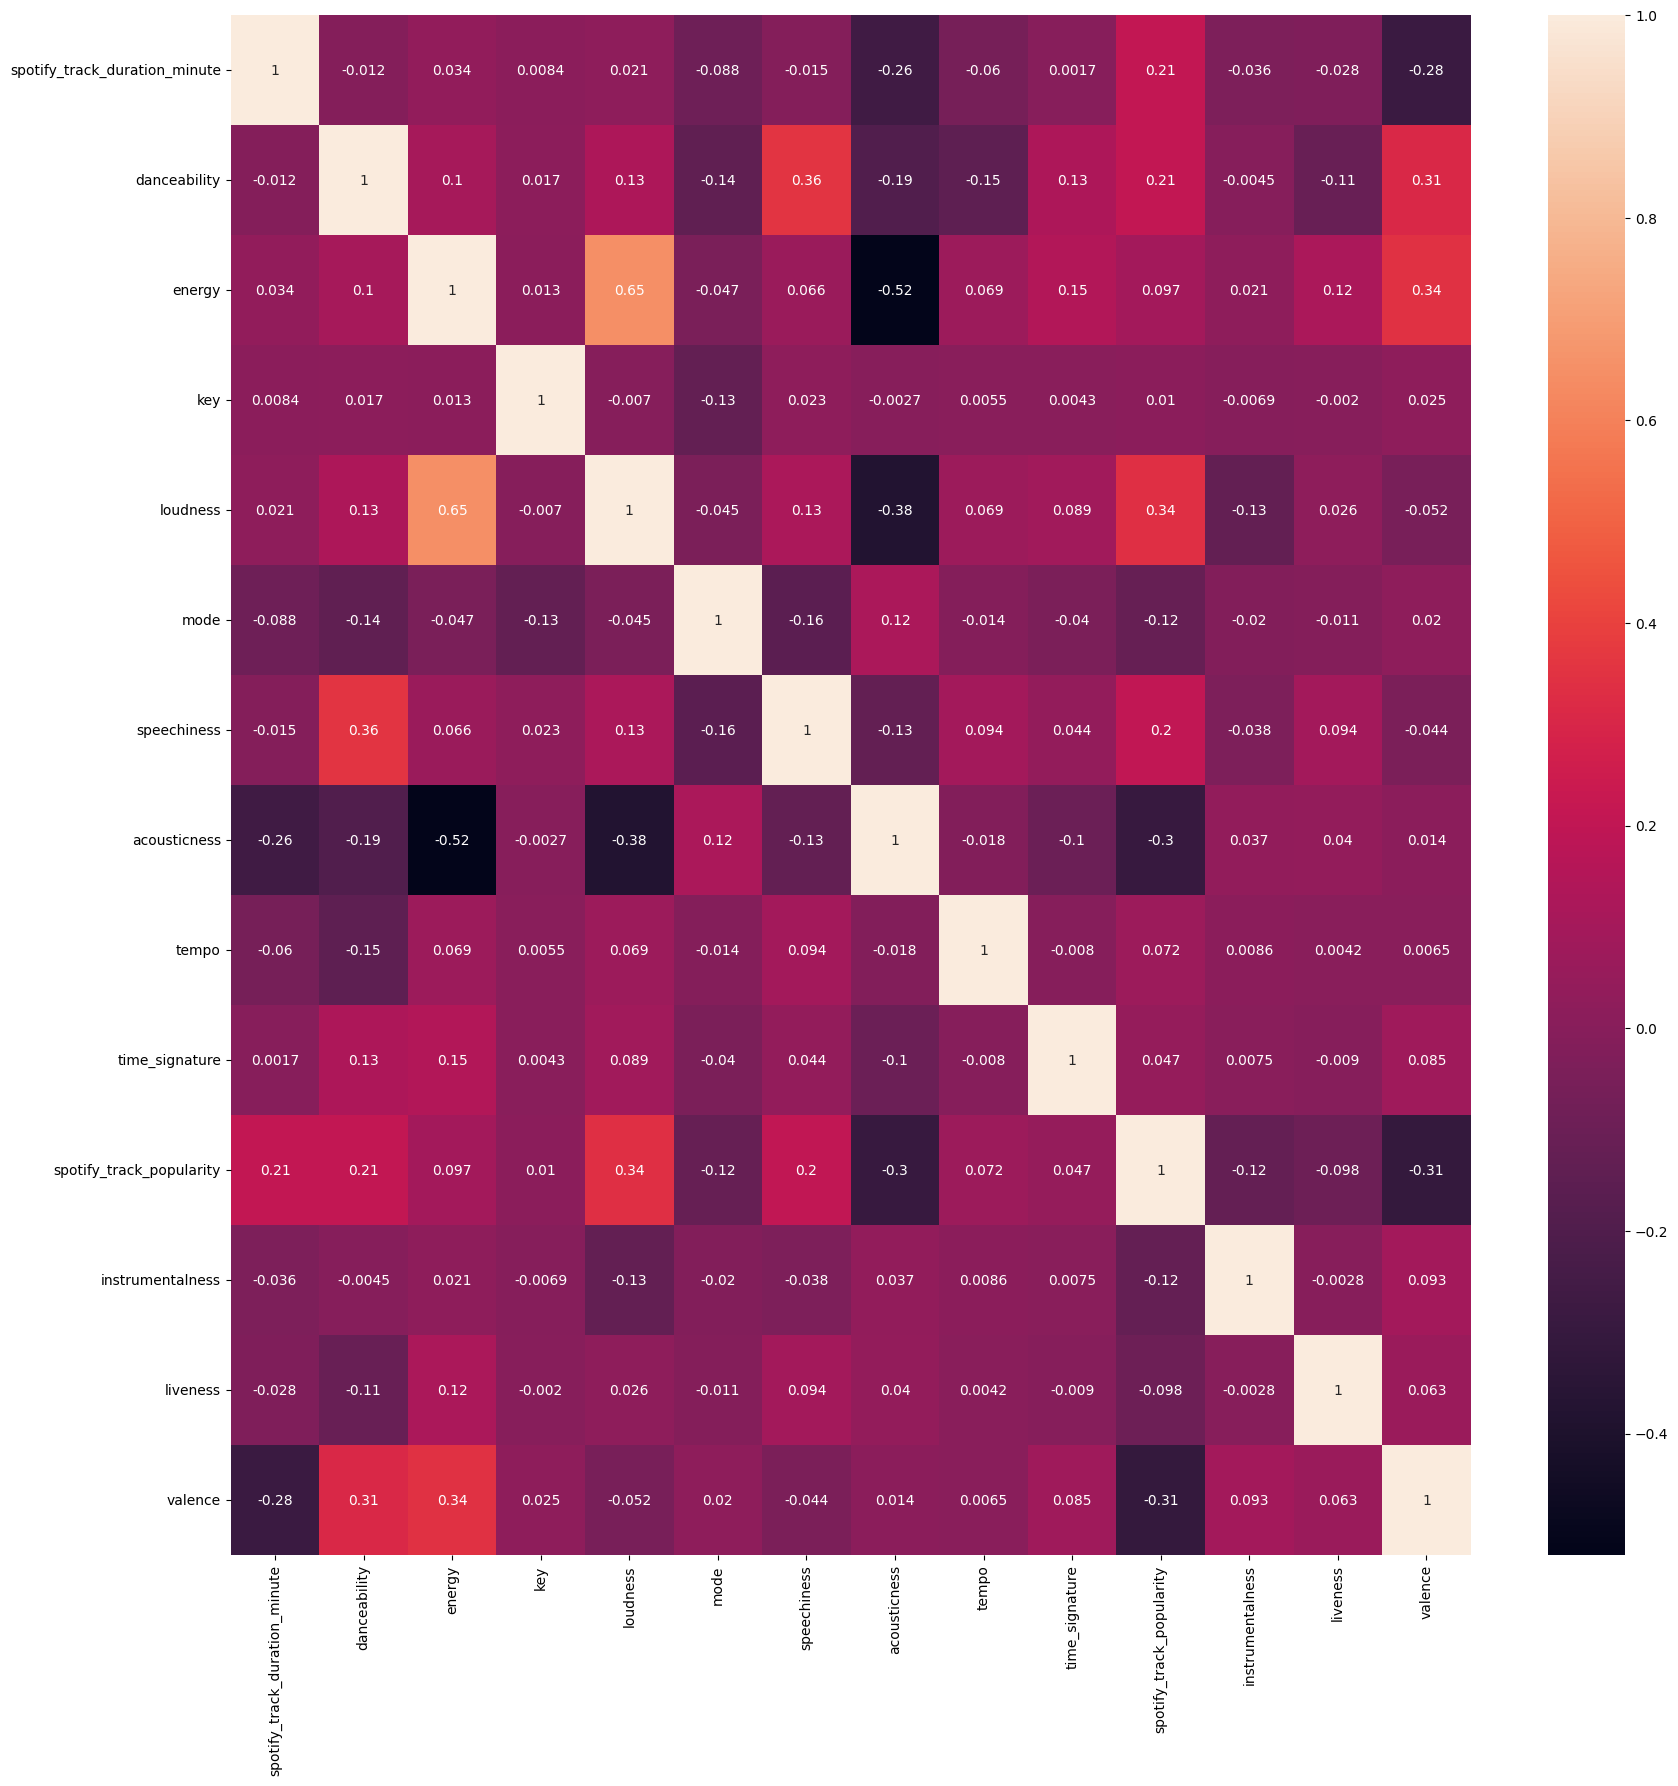

In [29]:
#i want to check possible correlation
plt.figure(figsize=(20,20))
sns.heatmap(user1_df[['spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness', 'valence']].corr(), annot= True)
plt.show()

We can notice that:

-   key is a useless 
-   tempo is a useless 
-   time signature is a useless 
-   spotify track popularity, we can se that is negative correlated with valence; it is positive correlated with loudness (BOTH INTERESTING)

So we can delite what are not usfull for our analysis

We redefine the list of feature delating the one that are useless 

We convert the maingenere in a integer value (we want try to use it for improve our NN)

--> da capire se una feature che era originariamente QUALITATIVA che convertiamo in NUMERICA 
possa effettivamente dare informazioni aggiuntive alla nostra NN (se si considera la sua frequenza può avere senso)

In [30]:
#first thing to do convert the maingenere in integer
#the idea consist to use the merge df qith value count on the maingenere and use the index
maing = merge_unique_df['maingenere'].value_counts()
dizio_main = {}
for index_maing in range(0,len(maing.index)): #value to indicate the genere
    dizio_main[maing.index[index_maing]] = index_maing
   #print(index_maing)


print(dizio_main)
#codifica dei maingeneri
merge_unique_numain_df = merge_unique_df.copy()
#rplace
merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
display(merge_unique_numain_df.head(3))

{'pop': 0, 'rock': 1, 'other': 2, 'soul': 3, 'rap': 4, 'country': 5, 'disco': 6, 'jazz': 7, 'blues': 8, 'funk': 9, 'dance': 10, 'metal': 11, 'folk': 12, 'house': 13, 'indie': 14, 'r&b': 15, 'latin': 16}


C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\1201508369.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_unique_numain_df['maingenere'].replace(dizio_main, inplace=True)
C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\1201508369.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  m

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.590,0.570,5.37,-9.970,...,0.0700,0.400,0.080000,0.200,0.63,117.760,3.89,22.16,2,2
......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",2.77,False,The Essential Andy Williams,0.154,0.185,5.00,-14.063,...,0.0315,0.911,0.000267,0.112,0.15,83.969,4.00,38.00,0,3


# AUTOMATIZE THE PROCESS + change the n. of initial neurons 

## 2) - 3)

### Our new feature

In [31]:
#now we remove the useless feature and add maingenere codified
new_feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness', 'maingenere'
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
new_target='valence'

IDEA:

make a loop for create the 5 df, one for each user + NN model for each df

In [32]:
merge_unique_numain_df['User'].unique()

array([2, 3, 0, 4, 1])

## PLOT

interesting plots for visualize the output of our model

In [33]:
def plot_for_model(history, y_hat, x_test):

    #plot loss
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure(figsize=(10,6))
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot 
    # aggiunto A.L
    plt.figure(figsize=(12,6))
    plt.plot(y_test, color='r')
    plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    plt.title('Prediction')
    plt.legend()
    plt.show()

## MODEL

In [34]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i
    

## FIT MODEL

In [35]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )

    return history_model

## MAIN

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2776 - mae: 0.4063 - val_loss: 0.0588 - val_mae: 0.1962
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0523 - mae: 0.1826 - val_loss: 0.0423 - val_mae: 0.1655
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - mae: 0.1557 - val_loss: 0.0382 - val_mae: 0.1580
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0352 - mae: 0.1502 - val_loss: 0.0351 - val_mae: 0.1509
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0328 - mae: 0.1445 - val_loss: 0.0342 - val_mae: 0.1496
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0328 - mae: 0.1449 - val_loss: 0.0335 - val_mae: 0.1469
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0305 - mae: 0.1388 - val_loss: 0.0324 - val_mae: 0.1441
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0301 - mae: 0.1392 - val_loss: 0.0322 - val_mae: 0.1435
Epoch 9/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295 

,Song,Performer,valence
SongID,,,
...Baby One More TimeBritney Spears,...Baby One More Time,Britney Spears,0.907
(I Know) I'm Losing YouThe Temptations,(I Know) I'm Losing You,The Temptations,0.813
(I Wanna) TestifyThe Parliaments,(I Wanna) Testify,The Parliaments,0.754
(If You Want It) Do It YourselfGloria Gaynor,(If You Want It) Do It Yourself,Gloria Gaynor,0.729
(Marie's The Name) His Latest FlameElvis Presley,(Marie's The Name) His Latest Flame,Elvis Presley,0.893
...,...,...,...
"Don't Try To Lay No Boogie Woogie On The ""King Of Rock & Roll""CROW","Don't Try To Lay No Boogie Woogie On The ""King...",CROW,0.840
Don't Turn AroundAce Of Base,Don't Turn Around,Ace Of Base,0.752
Don't Want To Live Without ItPablo Cruise,Don't Want To Live Without It,Pablo Cruise,0.892


-----------------------------------------------------
---------------------------------------------------------
USER 0


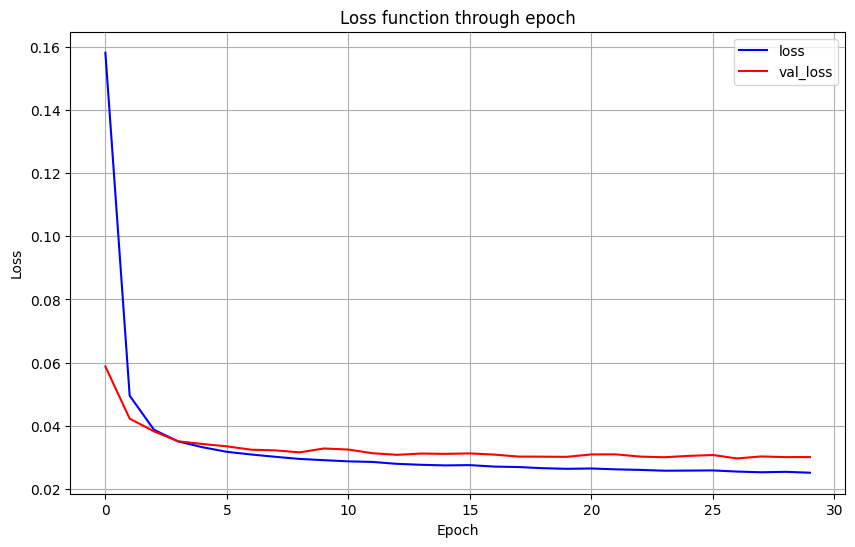

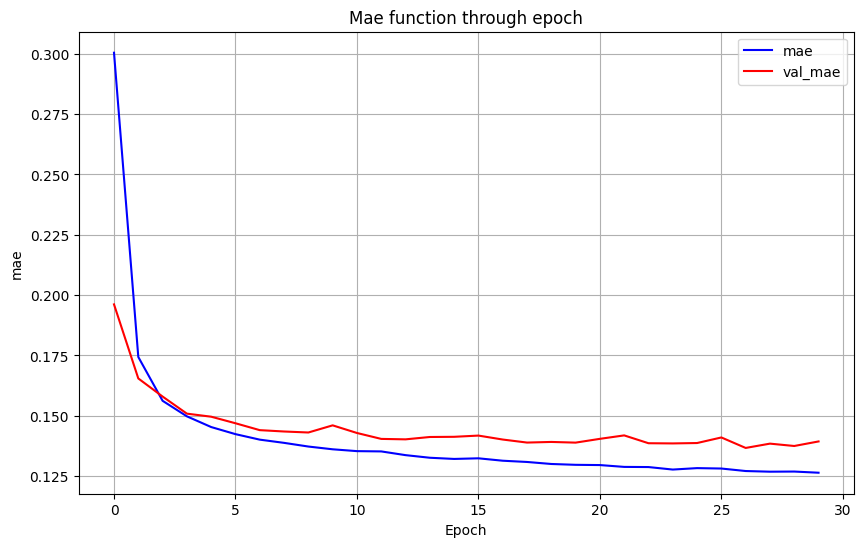

C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\883106043.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


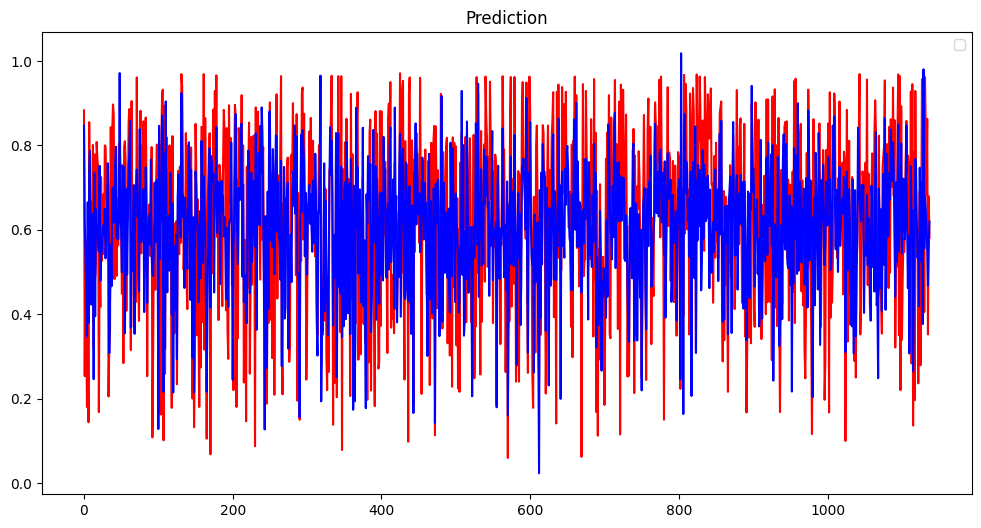

MSE


0.030080572847627853

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2355 - mae: 0.3833 - val_loss: 0.0601 - val_mae: 0.1946
Epoch 2/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0553 - mae: 0.1859 - val_loss: 0.0464 - val_mae: 0.1700
Epoch 3/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0415 - mae: 0.1623 - val_loss: 0.0396 - val_mae: 0.1557
Epoch 4/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0361 - mae: 0.1509 - val_loss: 0.0370 - val_mae: 0.1499
Epoch 5/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - mae: 0.1453 - val_loss: 0.0343 - val_mae: 0.1438
Epoch 6/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - mae: 0.1407 - val_loss: 0.0329 - val_mae: 0.1417
Epoch 7/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298 - mae: 0.1358 - val_loss: 0.0328 - val_mae: 0.1419
Epoch 8/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0304 - mae: 0.1385 - val_loss: 0.0315 - val_mae: 0.1392
Epoch 9/30
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 

,Song,Performer,valence
SongID,,,
'65 Love AffairPaul Davis,'65 Love Affair,Paul Davis,0.952
'Til My Baby Comes HomeLuther Vandross,'Til My Baby Comes Home,Luther Vandross,0.802
'Tis The Damn SeasonTaylor Swift,'Tis The Damn Season,Taylor Swift,0.348
('til) I Kissed YouThe Everly Brothers,('til) I Kissed You,The Everly Brothers,0.701
(I Wanna) Love My Life AwayGene Pitney,(I Wanna) Love My Life Away,Gene Pitney,0.924
...,...,...,...
Don't Forget I Love YouThe Butanes,Don't Forget I Love You,The Butanes,0.852
Don't Go Near The IndiansRex Allen,Don't Go Near The Indians,Rex Allen,0.743
Don't Let Her Be Your BabyThe Contours,Don't Let Her Be Your Baby,The Contours,0.839


-----------------------------------------------------
---------------------------------------------------------
USER 1


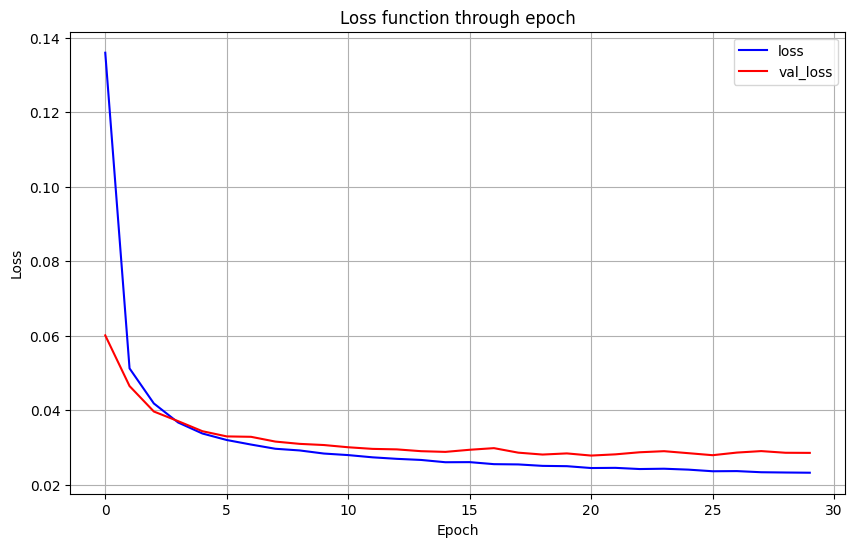

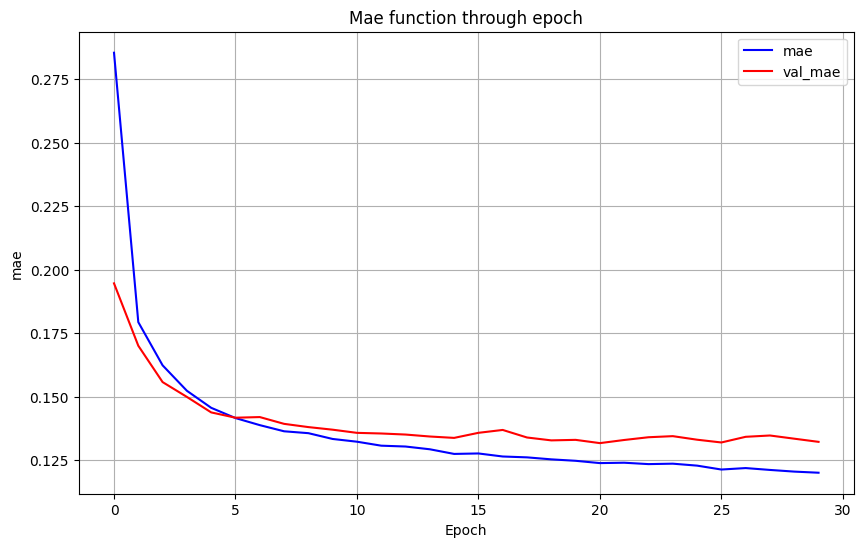

C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\883106043.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


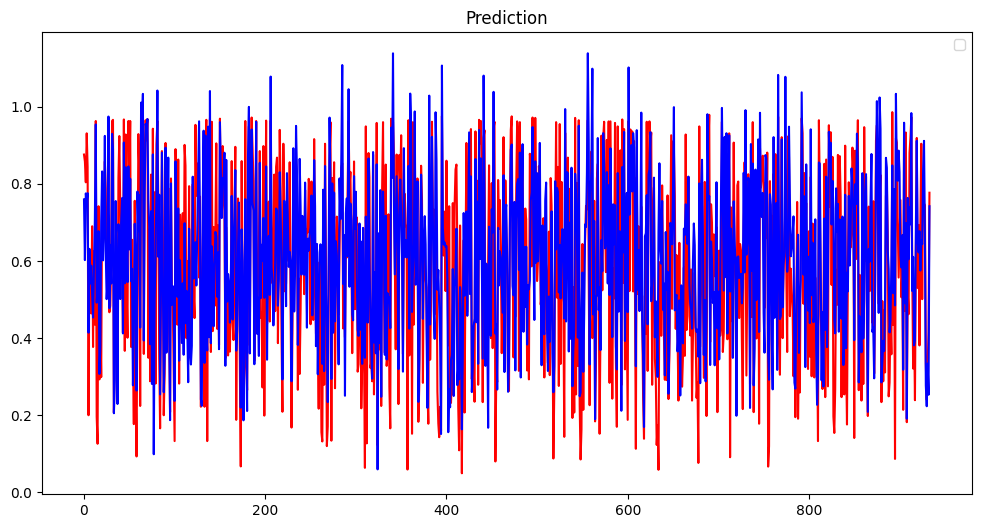

MSE


0.028496941234455828

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2867 - mae: 0.4216 - val_loss: 0.0439 - val_mae: 0.1520
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0388 - mae: 0.1445 - val_loss: 0.0284 - val_mae: 0.1207
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0268 - mae: 0.1168 - val_loss: 0.0244 - val_mae: 0.1090
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244 - mae: 0.1083 - val_loss: 0.0228 - val_mae: 0.1028
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0217 - mae: 0.1007 - val_loss: 0.0225 - val_mae: 0.0996
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0209 - mae: 0.0982 - val_loss: 0.0205 - val_mae: 0.0965
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0200 - mae: 0.0961 - val_loss: 0.0206 - val_mae: 0.0992
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - mae: 0.0975 - val_loss: 0.0198 - val_mae: 0.0942
Epoch 9/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 

,Song,Performer,valence
SongID,,,
...And Then There Were DrumsSandy Nelson,...And Then There Were Drums,Sandy Nelson,0.801
(1-2-3-4-5-6-7) Count The DaysInez & Charlie Foxx,(1-2-3-4-5-6-7) Count The Days,Inez & Charlie Foxx,0.630
(A Ship Will Come) Ein Schiff Wird KommenLale Anderson,(A Ship Will Come) Ein Schiff Wird Kommen,Lale Anderson,0.630
(All Of A Sudden) My Heart SingsMel Carter,(All Of A Sudden) My Heart Sings,Mel Carter,0.504
(Believed You Were) Lucky'Til Tuesday,(Believed You Were) Lucky,'Til Tuesday,0.495
...,...,...,...
Don't Be A Drop-OutJames Brown And The Famous Flames,Don't Be A Drop-Out,James Brown And The Famous Flames,0.690
Don't Be Afraid Of The DarkThe Robert Cray Band,Don't Be Afraid Of The Dark,The Robert Cray Band,0.757
Don't Be CruelBarbara Lynn,Don't Be Cruel,Barbara Lynn,0.771


-----------------------------------------------------
---------------------------------------------------------
USER 2


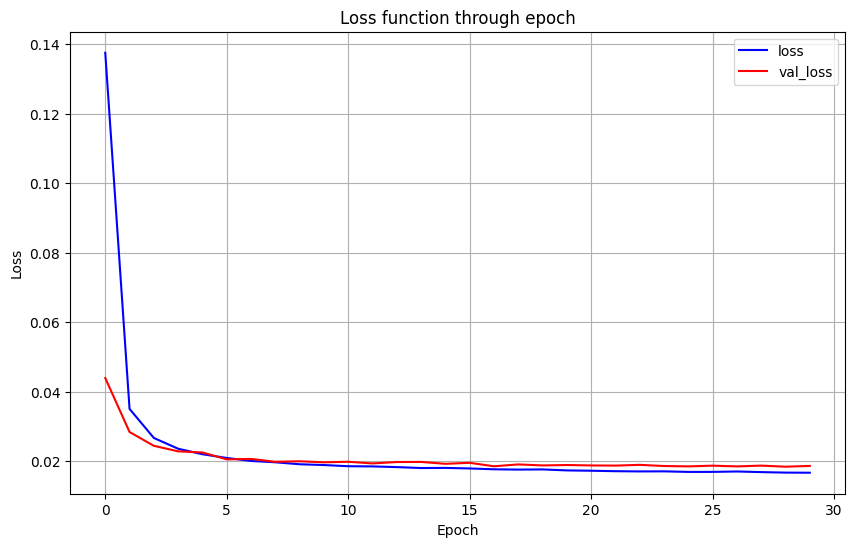

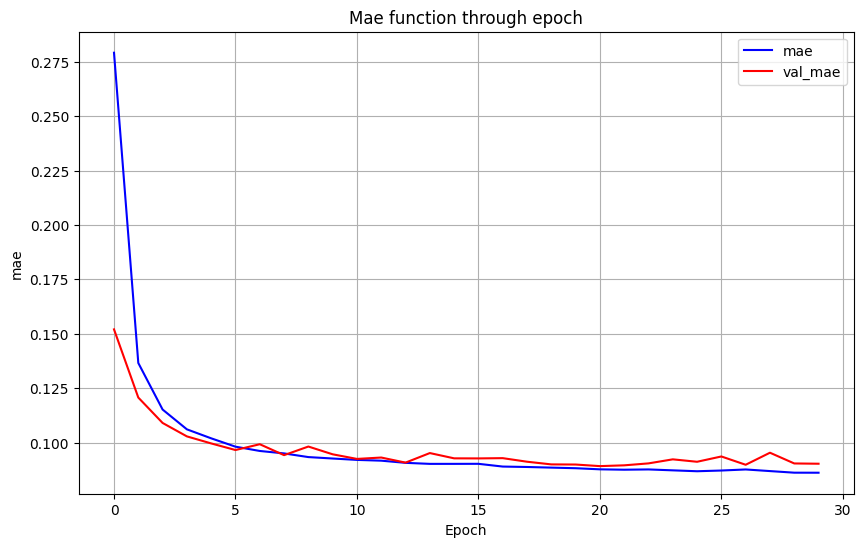

C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\883106043.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


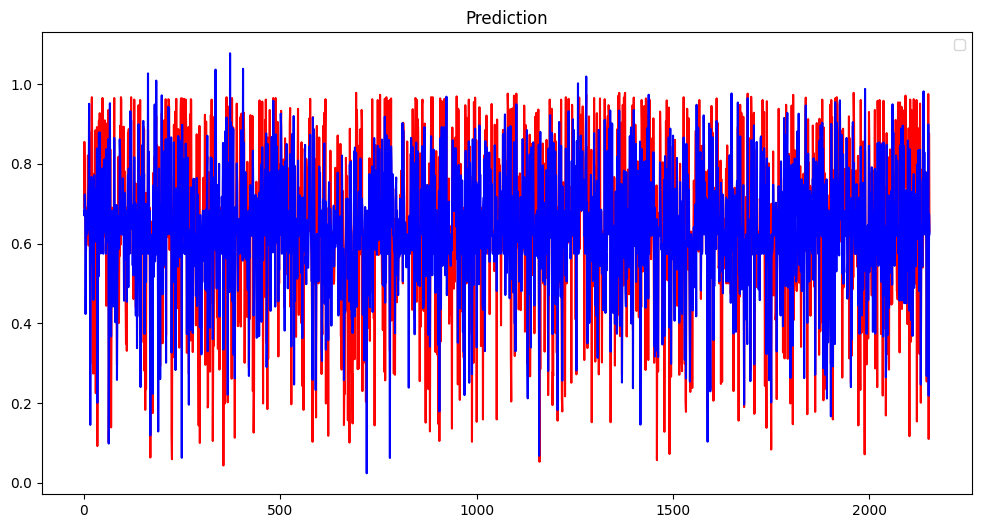

MSE


0.01858420440469932

Epoch 1/30


c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1532 - mae: 0.3017 - val_loss: 0.0652 - val_mae: 0.2007
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0569 - mae: 0.1852 - val_loss: 0.0497 - val_mae: 0.1754
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0451 - mae: 0.1673 - val_loss: 0.0431 - val_mae: 0.1621
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0371 - mae: 0.1559 - val_loss: 0.0402 - val_mae: 0.1563
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0349 - mae: 0.1494 - val_loss: 0.0374 - val_mae: 0.1517
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0328 - mae: 0.1449 - val_loss: 0.0358 - val_mae: 0.1490
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309 - mae: 0.1403 - val_loss: 0.0350 - val_mae: 0.1460
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0283 - mae: 0.1344 - val_loss: 0.0344 - val_mae: 0.1450
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0281 - mae: 0.1335 - va

,Song,Performer,valence
SongID,,,
......And Roses And RosesAndy Williams,......And Roses And Roses,Andy Williams,0.150
(Forever) Live And DieOrchestral Manoeuvres In The Dark,(Forever) Live And Die,Orchestral Manoeuvres In The Dark,0.865
(I Do The) Shimmy ShimmyBobby Freeman,(I Do The) Shimmy Shimmy,Bobby Freeman,0.891
(Lay Your Head On My) PillowTony Toni Tone,(Lay Your Head On My) Pillow,Tony Toni Tone,0.514
(Love Me) Love The Life I LeadThe Fantastics,(Love Me) Love The Life I Lead,The Fantastics,0.784
...,...,...,...
Do You Hear What I HearCarrie Underwood,Do You Hear What I Hear,Carrie Underwood,0.135
Doll HouseDonnie Brooks,Doll House,Donnie Brooks,0.703
"Dommage, Dommage (Too Bad, Too Bad)Jerry Vale","Dommage, Dommage (Too Bad, Too Bad)",Jerry Vale,0.105


-----------------------------------------------------
---------------------------------------------------------
USER 3


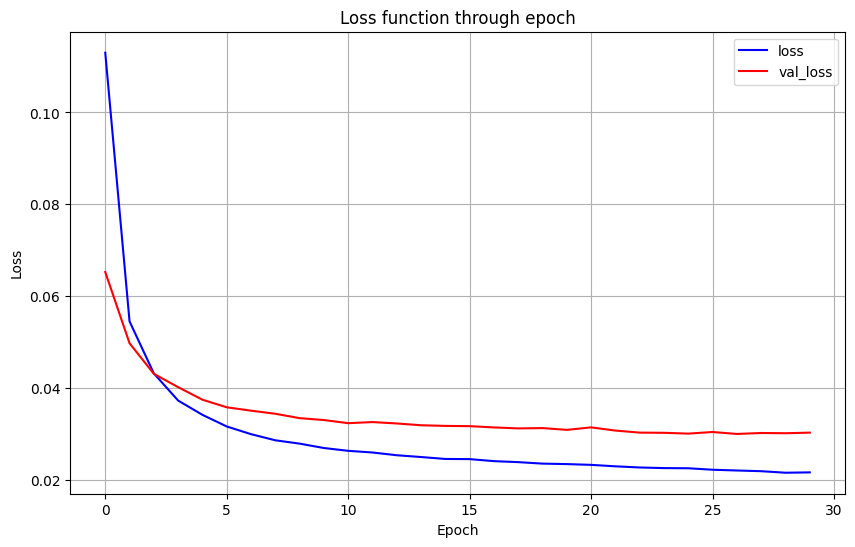

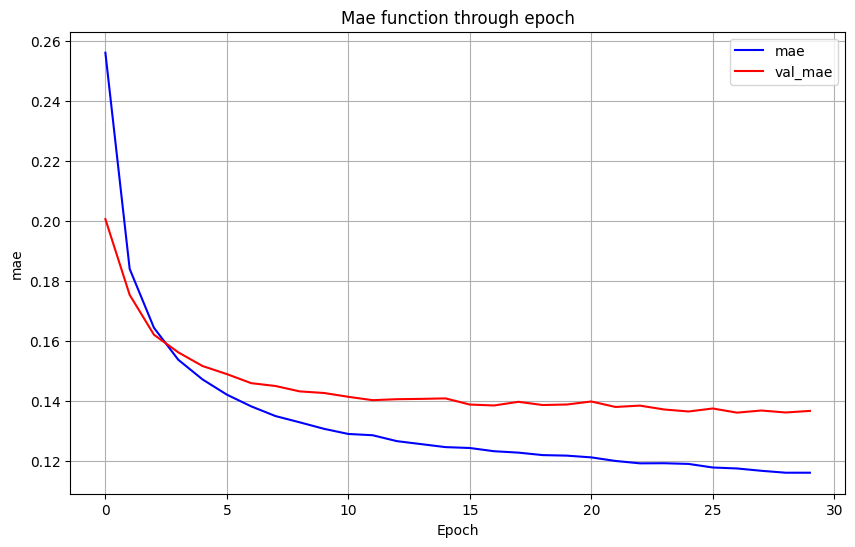

C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\883106043.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


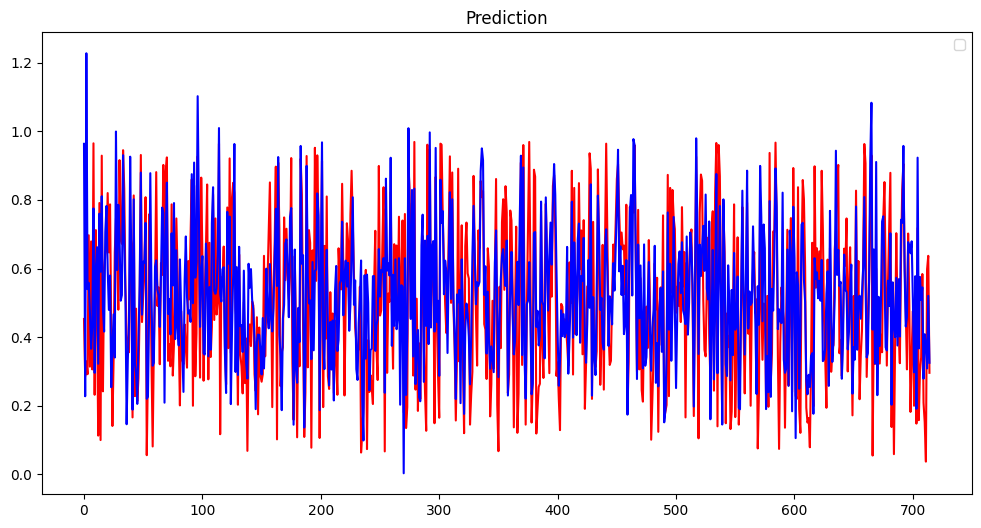

MSE


0.03025867116552817

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3801 - mae: 0.5059 - val_loss: 0.1162 - val_mae: 0.2706
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0898 - mae: 0.2370 - val_loss: 0.0674 - val_mae: 0.2062
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0546 - mae: 0.1851 - val_loss: 0.0543 - val_mae: 0.1858
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0445 - mae: 0.1681 - val_loss: 0.0475 - val_mae: 0.1732
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 - mae: 0.1627 - val_loss: 0.0428 - val_mae: 0.1642
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0386 - mae: 0.1544 - val_loss: 0.0401 - val_mae: 0.1587
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0376 - mae: 0.1536 - val_loss: 0.0382 - val_mae: 0.1555
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0340 - mae: 0.1480 - val_loss: 0.0371 - val_mae: 0.1535
Epoch 9/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0328 - mae: 

,Song,Performer,valence
SongID,,,
(Sittin' On) The Dock Of The BayMichael Bolton,(Sittin' On) The Dock Of The Bay,Michael Bolton,0.565
21 GunsGreen Day,21 Guns,Green Day,0.416
21Polo G,21,Polo G,0.533
33Polo G,33,Polo G,0.117
4th DimensionKIDS SEE GHOSTS Featuring Louis Prima,4th Dimension,KIDS SEE GHOSTS Featuring Louis Prima,0.734
...,...,...,...
Don't Disturb This GrooveThe System,Don't Disturb This Groove,The System,0.841
Don't Do ItThe Band,Don't Do It,The Band,0.775
Don't Laugh At MeMark Wills,Don't Laugh At Me,Mark Wills,0.267


-----------------------------------------------------
---------------------------------------------------------
USER 4


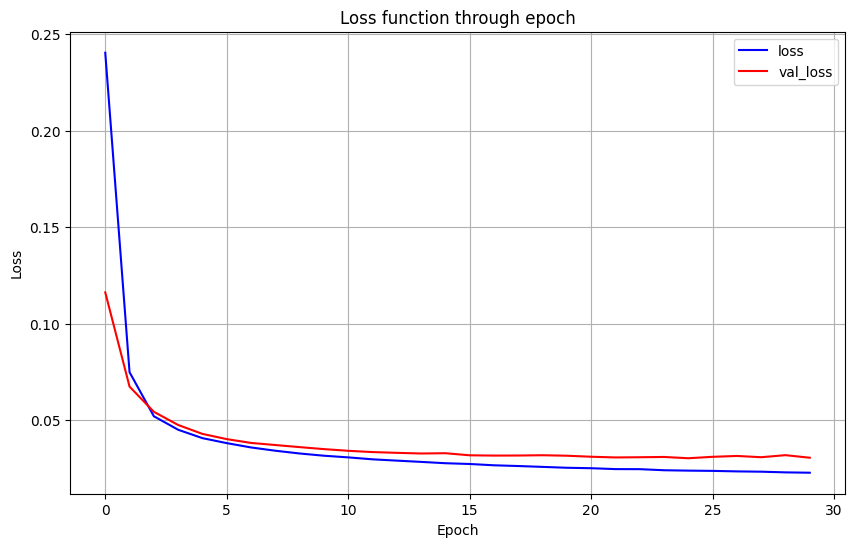

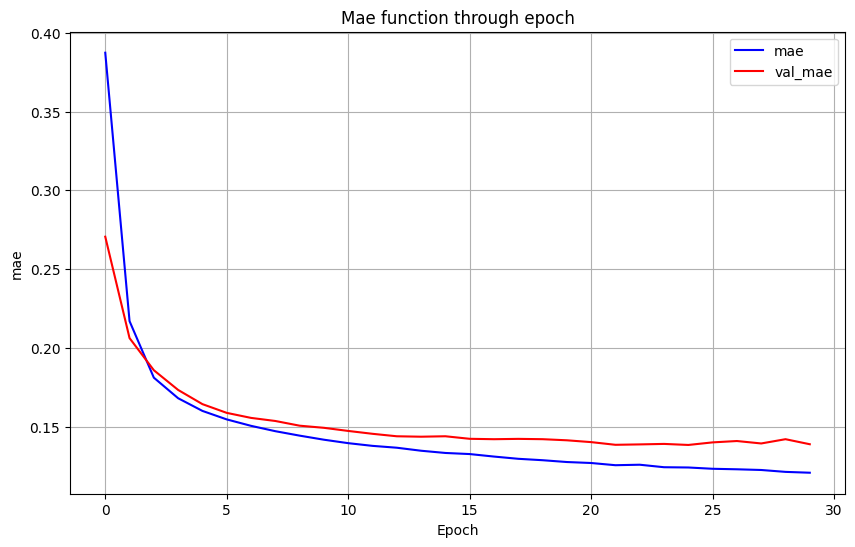

C:\Users\lovoa\AppData\Local\Temp\ipykernel_17812\883106043.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


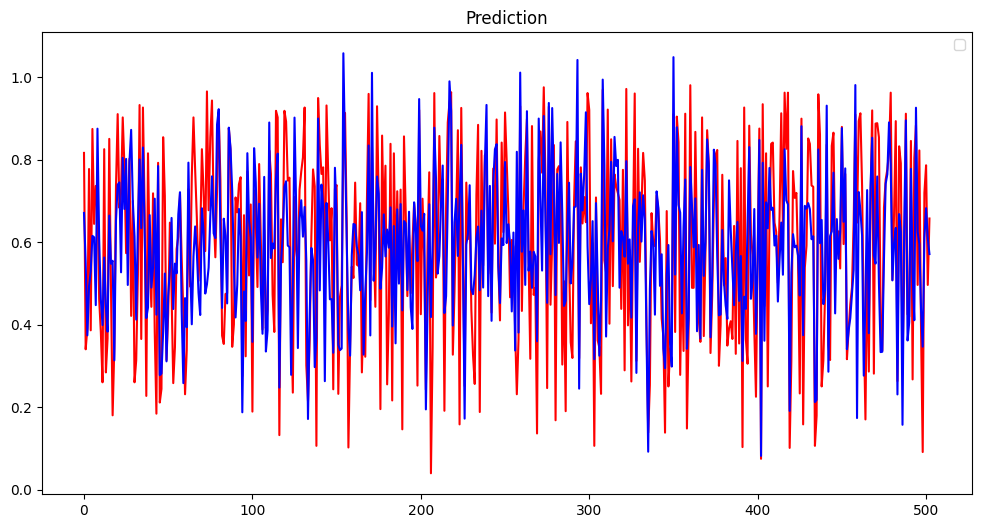

MSE


0.030489839391221803

In [ ]:
dizio_model_user = {} #in this dizio we store the model for each user

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#loop creation user and model
for i in range(0, len(merge_unique_numain_df['User'].unique())): #i indica lo user   

    #select user
    mask_user = merge_unique_numain_df['User'] == i
    #display(mask_user)
    user_i_df = merge_unique_numain_df[mask_user]
    #display(user_i_df) 

    #extract the feature and target
    x = user_i_df[feature]
    y = user_i_df[target]

    #normalization
    x_scaled = StandardScaler().fit_transform(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
    #display(x_train)

    #conversion
    y_train=np.array(y_train)
    y_test=np.array(y_test)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''

    # AGGIUNTO A.L.
    #y_hat=model_user_i.predict(x_train)
    y_hat = model_user_i.predict(x_test)

    ###################################
    ###################################
    # AGGIUNTO A.L. --> RECOMANDATION #
    ###################################
    ###################################

    #in order to have indices match between y_hat and x_test
    x_test_indices=user_i_df.iloc[np.arange(len(y_hat))].index
    # Threshold for raccommendations --> valence > 0.7
    reccomended_songs=user_i_df.loc[x_test_indices][y_hat.flatten()>0.7] # filtet songs with valence > 0.7

    # in order to visualize reccomandation
    print(f'\nReccomendations for User{i}:')
    if reccomended_songs.empty:
        print('No songs recommended based on valence threshold')
    else:
        display(reccomended_songs[['Song','Performer','valence']])

    # Now we want to save recommendation in dictionary
    reccomandations_songs_per_user['User{i}']=reccomended_songs

    #QUALCOSA NON QUADRA --> AGGIUNGE AL DIZIONARIO ANCHE CANZONI CON VALENCE > 0.7

    print('-----------------------------------------------------')

    #plot the metrics of the model
    print('---------------------------------------------------------')
    print(f'USER {i}')
    plot_for_model(history_model_user_i, y_hat, x_test)

    #compute MSE
    print('MSE')
    mse = mean_squared_error(y_test, y_hat)
    display(mse)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomended_songs} 

    

In [42]:
merge_unique_numain_df.columns

Index(['Performer', 'Song', 'spotify_genre', 'spotify_track_duration_minute',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'maingenere', 'User'],
      dtype='object')

## TEST DIZIONARIO MODELLI PER USER

In [ ]:
dizio_model_user['User0']['model_user_i'].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,981 (11.65 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,988 (7.77 KB)

In [ ]:
%store merge_unique_df

Stored 'merge_unique_df' (DataFrame)


In [ ]:
%store merge_unique_numain_df

Stored 'merge_unique_numain_df' (DataFrame)


In [ ]:
%store dizio_main

Stored 'dizio_main' (dict)
